### Wine Quality Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection 
from sklearn.utils import resample
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.utils import plot_model
import keras.backend as K


Using TensorFlow backend.


In [2]:
wine_df = pd.read_csv('winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [5]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
any_null = wine_df.isnull().sum()
print(any_null)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


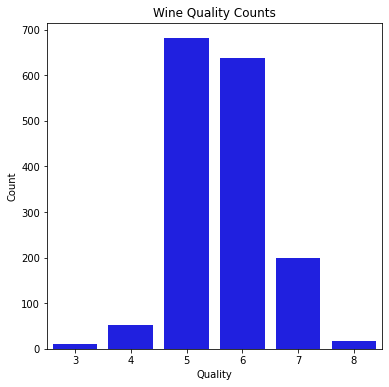

In [7]:
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x = 'quality', data = wine_df, label = 'Count', color='Blue')
plt.title('Wine Quality Counts')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

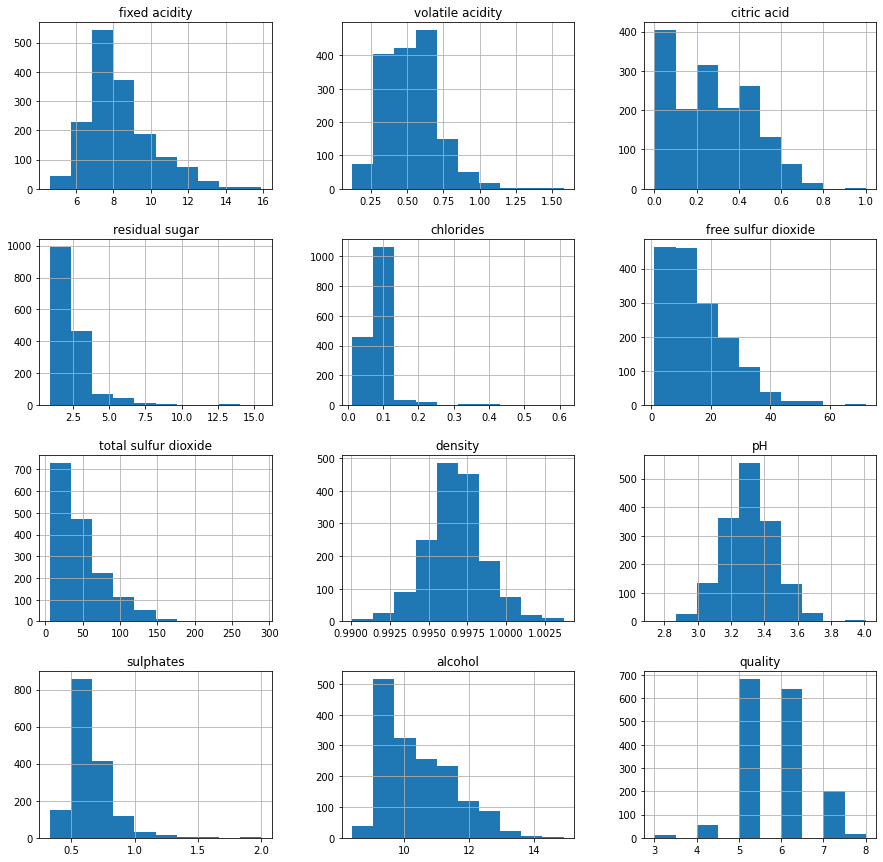

In [8]:
plt.rcParams['figure.figsize'] = [15,15]
wine_df.hist()
plt.show()

<AxesSubplot:>

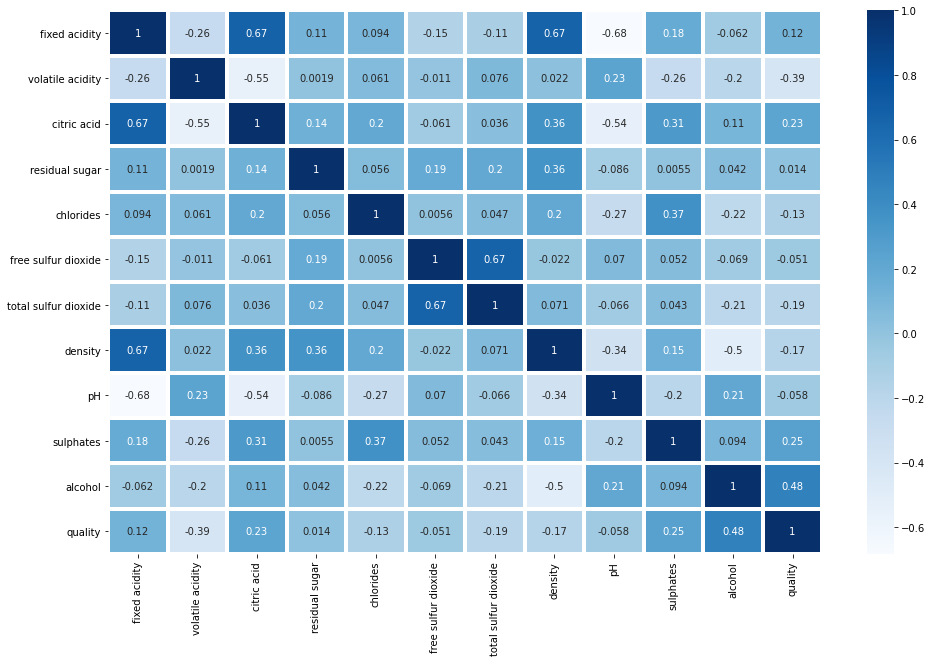

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(wine_df.corr(), linewidths=3, annot=True, cmap='Blues')

In [10]:
sc = StandardScaler()
wine_df_scaled = pd.DataFrame(sc.fit_transform(wine_df.drop('quality',axis=1)),columns=wine_df.columns[:-1])
wine_df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


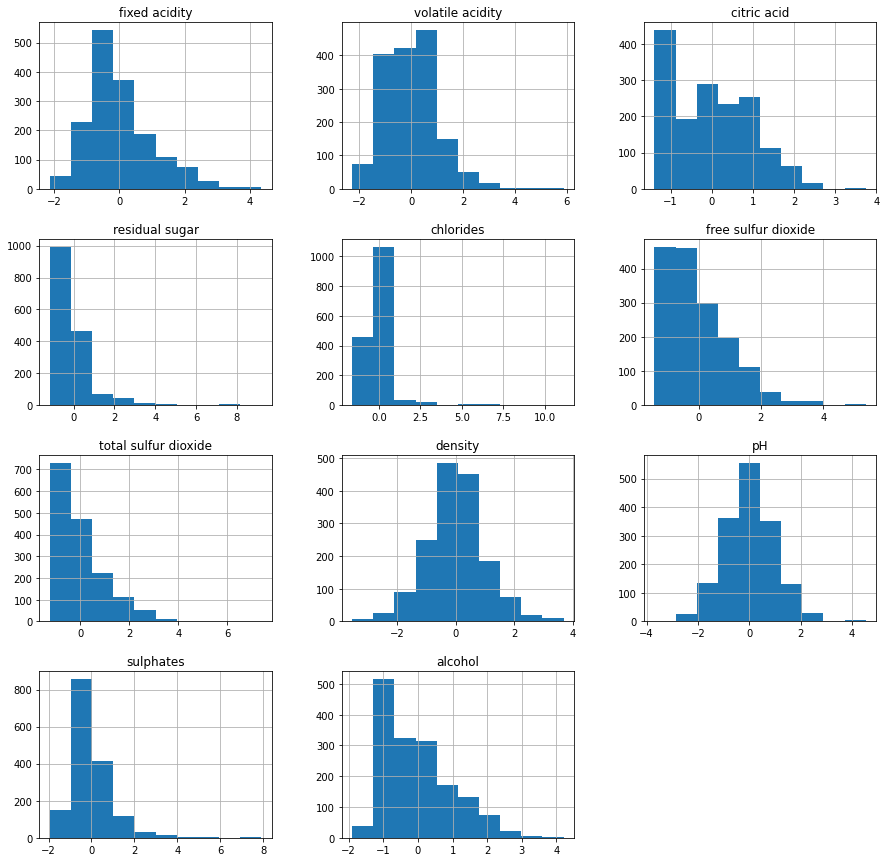

In [11]:
plt.rcParams['figure.figsize'] = [15,15]
wine_df_scaled.hist()
plt.show()

<AxesSubplot:>

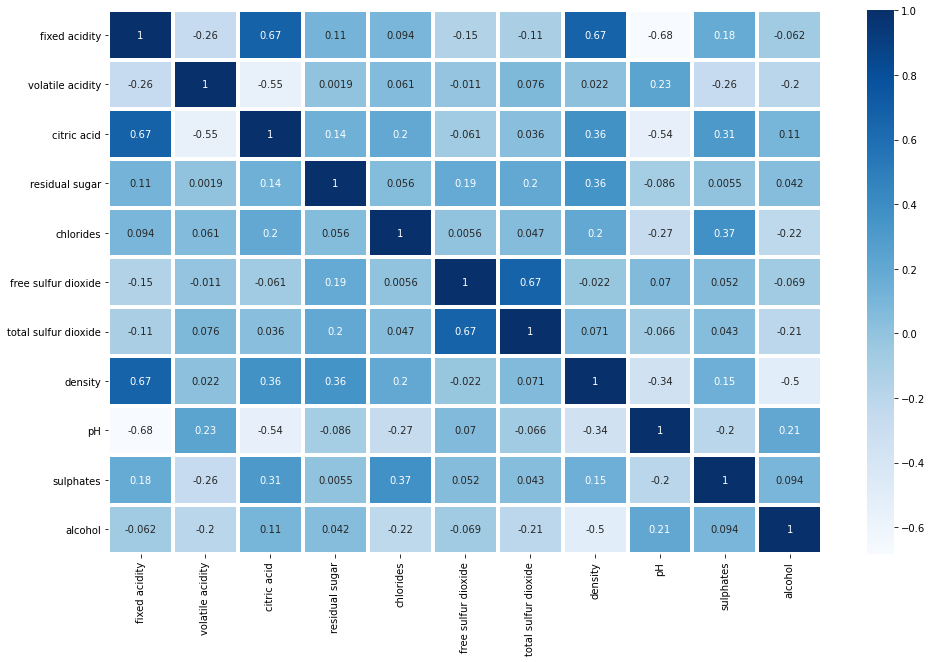

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(wine_df_scaled.corr(), linewidths=3, annot=True, cmap='Blues')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(wine_df_scaled, wine_df['quality'], test_size=0.3, random_state=100)
y_train.value_counts()

5    477
6    445
7    140
4     36
8     14
3      7
Name: quality, dtype: int64

In [14]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.03383072, 0.13163954, 0.07588048, 0.04125323, 0.0186899 ,
       0.        , 0.07693862, 0.0814138 , 0.05077718, 0.09987168,
       0.20249327])

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

alcohol                 0.202493
volatile acidity        0.131640
sulphates               0.099872
density                 0.081414
total sulfur dioxide    0.076939
citric acid             0.075880
pH                      0.050777
residual sugar          0.041253
fixed acidity           0.033831
chlorides               0.018690
free sulfur dioxide     0.000000
dtype: float64

In [16]:
seven_best_columns = SelectKBest(mutual_info_classif, k=7)
seven_best_columns.fit(X_train, y_train)
seven_best_columns  = X_train.columns[seven_best_columns.get_support()]
seven_best_columns

Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
       'density', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
X_train = X_train[seven_best_columns]
X_train

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
858,-1.384443,1.021999,-0.711289,-0.439951,0.060062,0.069937,0.166161
654,-0.323013,1.021999,-0.286214,-0.531178,0.611276,-1.169337,-0.866379
721,-0.267148,-0.159061,0.138860,1.810313,0.770280,-0.756246,-1.147981
176,-0.825796,-0.313113,-0.158692,-0.348724,-0.342749,-1.110324,-0.866379
692,-0.211283,1.227401,7.110081,0.472318,0.611276,3.020591,-1.335715
...,...,...,...,...,...,...,...
53,-0.825796,0.457144,-0.137438,2.205630,0.134264,-0.579207,-0.960246
350,0.794282,-0.261762,0.415159,-0.379133,1.936310,1.899343,-0.490910
79,0.542891,-0.364463,-0.158692,2.205630,0.240266,2.725526,-1.241848
792,0.459094,-1.288771,-0.137438,1.232543,0.372770,-0.343154,-0.678644


In [18]:
X_test = X_test[seven_best_columns]
X_test

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
1254,0.961877,-1.083370,-0.179946,-0.348724,-0.247346,0.187963,0.447763
1087,-1.887226,0.765247,-0.647527,-0.500769,-1.455778,0.187963,0.729364
822,0.068040,-0.723916,-0.243707,-0.318315,0.293268,-0.107102,-0.584777
1514,1.743983,-0.313113,-0.286214,0.563545,0.886883,0.365003,-1.116692
902,0.598756,-0.877968,-0.158692,-0.409542,0.325068,0.187963,0.353895
...,...,...,...,...,...,...,...
430,-1.607903,1.021999,-0.456244,-0.683222,0.558274,1.427238,0.541630
1273,0.291499,-0.364463,-0.307468,-0.075043,-0.957565,-1.346377,-1.054113
675,-0.658202,0.611196,-0.498751,-0.470360,0.876283,-0.048089,-0.209308
1235,-1.105120,0.251743,-0.711289,2.023176,-0.544154,-0.579207,1.010966


In [24]:
y_train.value_counts()

5    477
6    445
7    140
4     36
8     14
3      7
Name: quality, dtype: int64

In [25]:
y_test.value_counts()

5    204
6    193
7     59
4     17
8      4
3      3
Name: quality, dtype: int64

In [19]:
def report_model_performance(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    actual = [y_train, y_test]
    pred = [train_pred, test_pred]
    for i in range(0,2):
        if i==0:
            print('----Train Metrics----')
        else:
            print('----Test Metrics----')
        metrics(actual[i], pred[i])

In [20]:
def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

In [20]:
lg = LogisticRegression(multi_class='ovr')

In [21]:
report_model_performance(lg)

----Train Metrics----
Confusion Matrix:
 [[  0   0   6   1   0   0]
 [  0   0  25  10   1   0]
 [  0   0 372 104   1   0]
 [  0   0 163 272  10   0]
 [  0   0  13 103  24   0]
 [  0   0   0   9   5   0]]


Accuracy Score:
 0.5969615728328865


Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        36
           5       0.64      0.78      0.70       477
           6       0.55      0.61      0.58       445
           7       0.59      0.17      0.27       140
           8       0.00      0.00      0.00        14

    accuracy                           0.60      1119
   macro avg       0.30      0.26      0.26      1119
weighted avg       0.56      0.60      0.56      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   0   9   8   0   0]
 [  0   0 147  56   1   0]
 [  0   0  63 124   6   0]
 [  0   0   3  45  11   0]
 [  0   0   0

In [22]:
knn = KNeighborsClassifier()

In [23]:
report_model_performance(knn)

----Train Metrics----
Confusion Matrix:
 [[  2   0   4   0   1   0]
 [  0   4  18  13   1   0]
 [  0   1 392  79   5   0]
 [  0   2 106 317  19   1]
 [  0   0  22  45  73   0]
 [  0   0   1   6   7   0]]


Accuracy Score:
 0.7042001787310098


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.29      0.44         7
           4       0.57      0.11      0.19        36
           5       0.72      0.82      0.77       477
           6       0.69      0.71      0.70       445
           7       0.69      0.52      0.59       140
           8       0.00      0.00      0.00        14

    accuracy                           0.70      1119
   macro avg       0.61      0.41      0.45      1119
weighted avg       0.69      0.70      0.69      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   1   2   0   0]
 [  0   1  10   5   1   0]
 [  0   2 152  47   3   0]
 [  0   1  53 119  20   0]
 [  0   0   8  26  25   0]
 [  0   0   1

In [24]:
rf = RandomForestClassifier()
report_model_performance(rf)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 155  46   3   0]
 [  0   0  42 135  16   0]
 [  0   0   1  27  31   0]
 [  0   0   0   1   3   0]]


In [25]:
dt = DecisionTreeClassifier()
report_model_performance(dt)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   5   2  10   0   0]
 [  0   6 131  60   7   0]
 [  1   7  50 109  24   2]
 [  0   0   6  25  27   1]
 [  0   0   1   1   0   2]]


#### Try with balanced classes using resampling technique. 

While performing ressampling also want to ensure the features are normally distributed. Hence, log tranforming features.  

In [21]:
def log_transform(col):
    return np.log(col[0])

In [22]:
wine_df['residual sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)
wine_df['free sulfur dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total sulfur dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['chlorides']=wine_df[['chlorides']].apply(log_transform, axis=1)

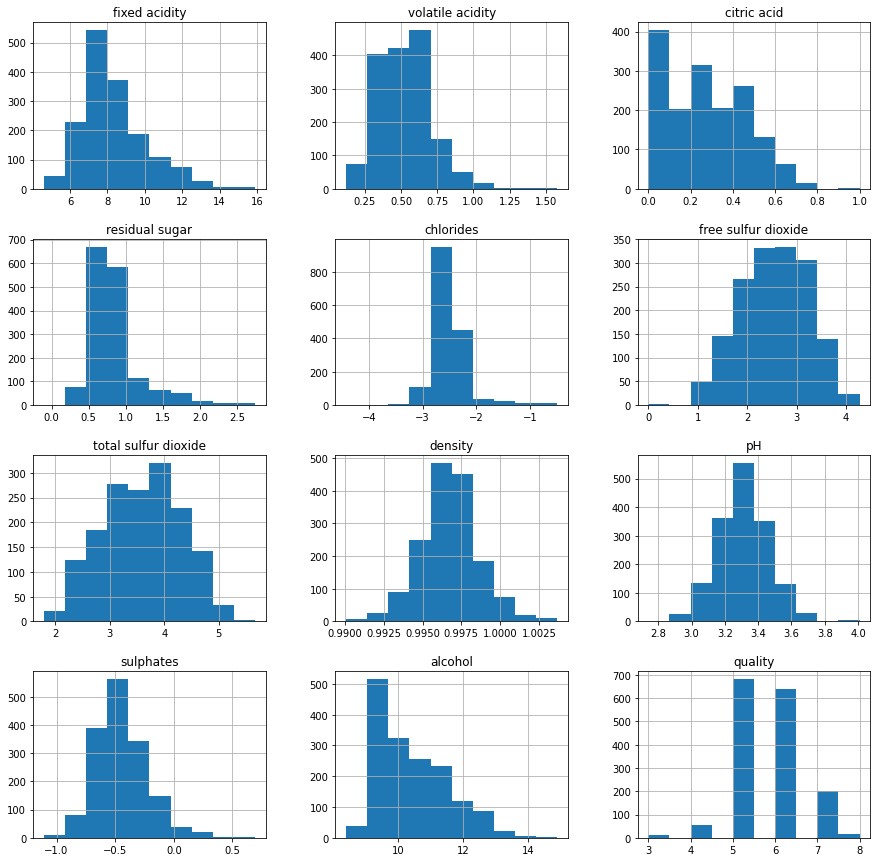

In [23]:
plt.rcParams['figure.figsize'] = [15,15]
wine_df.hist()
plt.show()

In [26]:
wine_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

In [27]:
df_3 = wine_df[wine_df.quality==3]
df_4 = wine_df[wine_df.quality==4]
df_5 = wine_df[wine_df.quality==5]
df_6 = wine_df[wine_df.quality==6]
df_7 = wine_df[wine_df.quality==7]
df_8 = wine_df[wine_df.quality==8]

In [28]:
df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12)
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12)
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12)
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12)

df_5_downsampled = df_5.sample(n=600).reset_index(drop=True)
df_6_downsampled = df_6.sample(n=600).reset_index(drop=True)

In [29]:
wine_df_balanced = pd.concat([df_3_upsampled, df_4_upsampled, df_5_downsampled, df_6_downsampled, df_7_upsampled, df_8_upsampled]).reset_index(drop=True)

In [30]:
wine_df_balanced['quality'].value_counts()

4    600
6    600
8    600
3    600
5    600
7    600
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

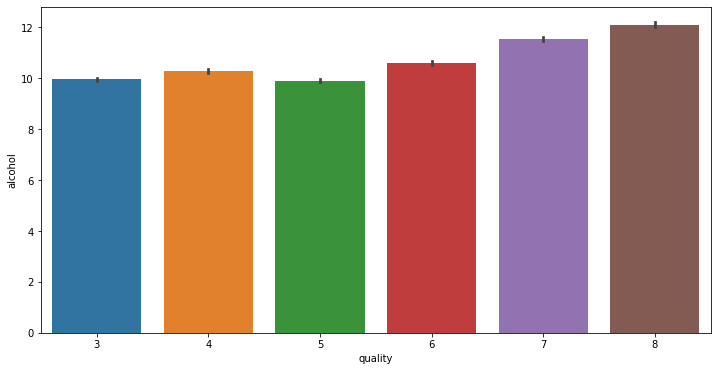

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='quality', y='alcohol', data=wine_df_balanced)

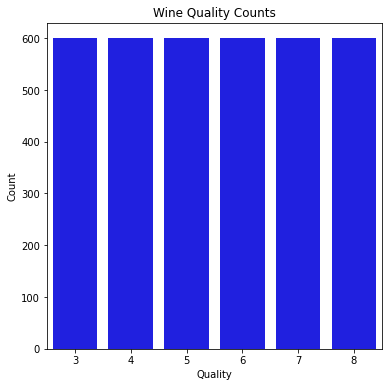

In [34]:
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x = 'quality', data = wine_df_balanced, label = 'Count', color='Blue')
plt.title('Wine Quality Counts')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

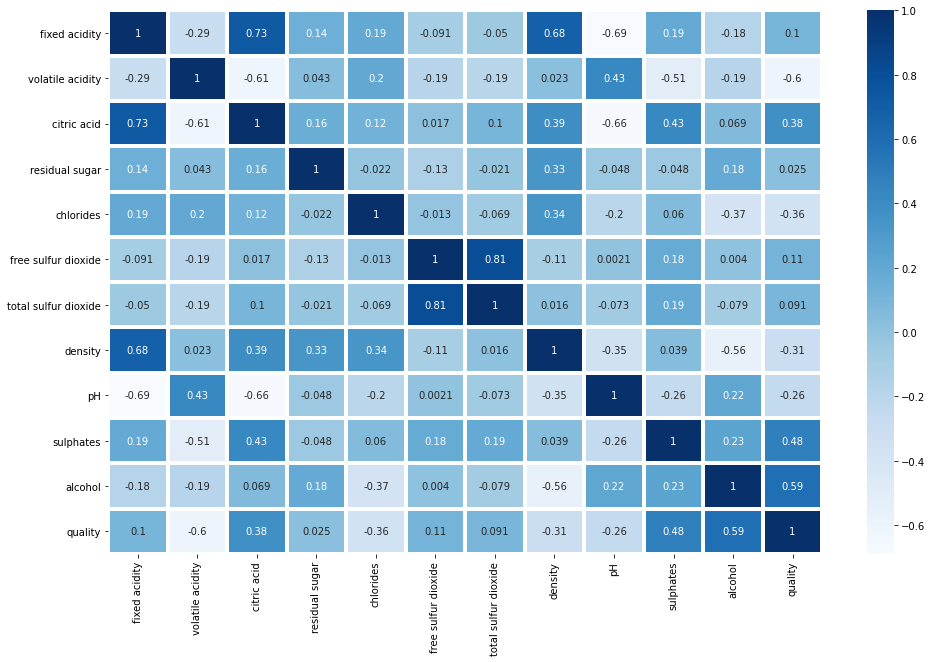

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(wine_df_balanced.corr(), linewidths=3, annot=True, cmap='Blues')

In [32]:
selected_features = ['alcohol', 'sulphates', 'citric acid', 'free sulfur dioxide', 'fixed acidity', 
                     'total sulfur dioxide', 'residual sugar']

In [33]:
x = wine_df_balanced[selected_features]
y=wine_df_balanced['quality']

In [34]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12)

In [35]:
y_train.value_counts()

4    421
7    405
3    403
5    399
6    398
8    386
Name: quality, dtype: int64

In [36]:
y_test.value_counts()

8    214
6    202
5    201
3    197
7    195
4    179
Name: quality, dtype: int64

In [37]:
X_train.shape

(2412, 7)

In [38]:
X_test.shape

(1188, 7)

In [39]:
n_neighbors = [5, 10, 15, 20]
for neighbors in n_neighbors:
    knn = KNeighborsClassifier(neighbors)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("Score For neighbors ", neighbors, "is given as ", score)

Score For neighbors  5 is given as  0.7920875420875421
Score For neighbors  10 is given as  0.7331649831649831
Score For neighbors  15 is given as  0.686026936026936
Score For neighbors  20 is given as  0.6708754208754208


In [40]:
for neighbor in n_neighbors:
    model = KNeighborsClassifier(neighbor, weights='distance')
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Score For neighbors ", neighbor, "is given as ", score)

Score For neighbors  5 is given as  0.8468013468013468
Score For neighbors  10 is given as  0.8232323232323232
Score For neighbors  15 is given as  0.8198653198653199
Score For neighbors  20 is given as  0.8223905723905723


In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)
test_preds = knn_model.predict(X_test)

In [42]:
print("Train data Reports: \n")
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))


print("Test data Report: \n")
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

Train data Reports: 

[[403   0   0   0   0   0]
 [  0 421   0   0   0   0]
 [  0   0 399   0   0   0]
 [  0   0   0 398   0   0]
 [  0   0   0   0 405   0]
 [  0   0   0   0   0 386]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       403
           4       1.00      1.00      1.00       421
           5       1.00      1.00      1.00       399
           6       1.00      1.00      1.00       398
           7       1.00      1.00      1.00       405
           8       1.00      1.00      1.00       386

    accuracy                           1.00      2412
   macro avg       1.00      1.00      1.00      2412
weighted avg       1.00      1.00      1.00      2412

Test data Report: 

[[197   0   0   0   0   0]
 [  0 179   0   0   0   0]
 [  0  20 125  43  13   0]
 [  0  16  32 101  46   7]
 [  0   0   1   2 190   2]
 [  0   0   0   0   0 214]]
              precision    recall  f1-score   support

           3       1.00      1.00 

In [43]:
rf = RandomForestClassifier()
report_model_performance(rf)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  11   6   0   0]
 [  0   0 156  45   3   0]
 [  0   0  41 132  20   0]
 [  0   0   1  27  31   0]
 [  0   0   0   1   3   0]]


#### Hyperparameter tuning for RandomForest

In [44]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 250, 500, 1000, 2000],
    "criterion": ["gini", "entropy"],
     }

# Create a default rf model
rf = RandomForestClassifier(random_state=1,           # for consistent results
                                      oob_score=True,           # OOB Score to get performance
                                      bootstrap=True, 
                                      n_jobs=-1,                # for using all cores
                                      class_weight="balanced" )
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [45]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.0s finished


{'criterion': 'entropy', 'n_estimators': 2000}

In [46]:
best_grid = grid_search.best_estimator_
print(best_grid)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=2000, n_jobs=-1, oob_score=True,
                       random_state=1)


In [47]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=250, n_jobs=-1,
                       oob_score=True, random_state=1)

report_model_performance(rf)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   1  10   5   1   0]
 [  0   0 156  46   2   0]
 [  0   0  48 130  15   0]
 [  0   0   1  28  30   0]
 [  0   0   0   1   3   0]]


In [48]:
dt = DecisionTreeClassifier()
report_model_performance(dt)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   1   2   0   0]
 [  0   5   3   9   0   0]
 [  0   6 131  58   9   0]
 [  1   6  54 110  20   2]
 [  0   0   5  20  32   2]
 [  0   0   1   1   1   1]]


#### Neural Network with Scalled Data (not balanced classes)

In [49]:
Y = wine_df['quality']
Y = pd.get_dummies(Y).iloc[:,1:]
Y.head(5)

,4,5,6,7,8
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [50]:
X = wine_df_scaled.iloc[:,0:11].values

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1279, 11) (1279, 5) (320, 11) (320, 5)


In [52]:
def get_model(optimizer='Adam'):
    model = Sequential()
    # layer 1
    model.add(Dense(30, input_dim=11, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    #layer 2
    model.add(Dense(50, name='fc1',bias_initializer='zeros'))
    model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    #layer 3
    model.add(Dense(100, name='fc2',bias_initializer='zeros'))
    model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    #layer 4
    model.add(Dense(5, name='fc3',bias_initializer='zeros'))
    model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    model.add(Activation('softmax'))
    
#     Adam = optimizers.Adam()
    model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
    
    return model

In [53]:
model = get_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc0 (Dense)                  (None, 30)                360       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
fc1 (Dense)                  (None, 50)                1550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
fc2 (Dense)                  (None, 100)              

In [54]:
model.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))


Train on 1279 samples, validate on 320 samples
Epoch 1/200
1279/1279 [==============================] - 1s 640us/step - loss: 1.9970 - accuracy: 0.2447 - val_loss: 1.6375 - val_accuracy: 0.4344
Epoch 2/200
1279/1279 [==============================] - 0s 89us/step - loss: 1.7997 - accuracy: 0.3096 - val_loss: 1.5556 - val_accuracy: 0.4969
Epoch 3/200
1279/1279 [==============================] - 0s 88us/step - loss: 1.6803 - accuracy: 0.3628 - val_loss: 1.5235 - val_accuracy: 0.5063
Epoch 4/200
1279/1279 [==============================] - 0s 87us/step - loss: 1.5991 - accuracy: 0.3987 - val_loss: 1.5015 - val_accuracy: 0.5094
Epoch 5/200
1279/1279 [==============================] - 0s 85us/step - loss: 1.5336 - accuracy: 0.4582 - val_loss: 1.4834 - val_accuracy: 0.5094
Epoch 6/200
1279/1279 [==============================] - 0s 83us/step - loss: 1.5017 - accuracy: 0.4636 - val_loss: 1.4702 - val_accuracy: 0.5156
Epoch 7/200
1279/1279 [==============================] - 0s 86us/step - los

1279/1279 [==============================] - 0s 80us/step - loss: 0.9381 - accuracy: 0.6521 - val_loss: 1.0179 - val_accuracy: 0.5969
Epoch 56/200
1279/1279 [==============================] - 0s 83us/step - loss: 0.9088 - accuracy: 0.6779 - val_loss: 1.0150 - val_accuracy: 0.6062
Epoch 57/200
1279/1279 [==============================] - 0s 83us/step - loss: 0.9010 - accuracy: 0.6599 - val_loss: 1.0049 - val_accuracy: 0.6062
Epoch 58/200
1279/1279 [==============================] - 0s 83us/step - loss: 0.9107 - accuracy: 0.6622 - val_loss: 1.0128 - val_accuracy: 0.5938
Epoch 59/200
1279/1279 [==============================] - 0s 83us/step - loss: 0.9169 - accuracy: 0.6583 - val_loss: 1.0051 - val_accuracy: 0.6031
Epoch 60/200
1279/1279 [==============================] - 0s 83us/step - loss: 0.9016 - accuracy: 0.6716 - val_loss: 1.0016 - val_accuracy: 0.6031
Epoch 61/200
1279/1279 [==============================] - 0s 80us/step - loss: 0.9087 - accuracy: 0.6599 - val_loss: 0.9982 - val_a

Epoch 111/200
1279/1279 [==============================] - 0s 93us/step - loss: 0.8098 - accuracy: 0.6966 - val_loss: 0.9667 - val_accuracy: 0.6031
Epoch 112/200
1279/1279 [==============================] - 0s 207us/step - loss: 0.7943 - accuracy: 0.6974 - val_loss: 0.9668 - val_accuracy: 0.5875
Epoch 113/200
1279/1279 [==============================] - 0s 212us/step - loss: 0.8058 - accuracy: 0.6888 - val_loss: 0.9763 - val_accuracy: 0.6031
Epoch 114/200
1279/1279 [==============================] - 0s 213us/step - loss: 0.8012 - accuracy: 0.6865 - val_loss: 0.9678 - val_accuracy: 0.6031
Epoch 115/200
1279/1279 [==============================] - 0s 214us/step - loss: 0.8079 - accuracy: 0.7037 - val_loss: 0.9724 - val_accuracy: 0.6000
Epoch 116/200
1279/1279 [==============================] - 0s 212us/step - loss: 0.7848 - accuracy: 0.7029 - val_loss: 0.9708 - val_accuracy: 0.5875
Epoch 117/200
1279/1279 [==============================] - 0s 213us/step - loss: 0.7808 - accuracy: 0.6966 

In [55]:
preds = model.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

320/320 [==============================] - 0s 84us/step

Loss = 0.9868796050548554
Test Accuracy = 0.621874988079071


#### Neural network with balanced classes. 

In [56]:
wine_df_balanced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.815,0.00,0.182322,-1.320507,2.772589,3.367296,0.99471,3.32,-0.673345,9.8,3
1,10.4,0.610,0.49,0.741937,-1.609438,1.609438,2.772589,0.99940,3.16,-0.462035,8.4,3
2,7.4,1.185,0.00,1.446919,-2.333044,1.609438,2.639057,0.99660,3.63,-0.616186,10.7,3
3,10.4,0.440,0.42,0.405465,-1.931022,3.526361,3.871201,0.99832,3.38,-0.150823,9.9,3
4,10.4,0.440,0.42,0.405465,-1.931022,3.526361,3.871201,0.99832,3.38,-0.150823,9.9,3


In [57]:
x = wine_df_balanced[selected_features]
y = wine_df_balanced['quality']

In [58]:
y = pd.get_dummies(y).iloc[:,1:]
y.head(5)

,4,5,6,7,8
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1279, 11) (1279, 5) (320, 11) (320, 5)


In [60]:
model = get_model()

In [61]:
history = model.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Train on 1279 samples, validate on 320 samples
Epoch 1/200
1279/1279 [==============================] - 1s 655us/step - loss: 2.0141 - accuracy: 0.2244 - val_loss: 1.7360 - val_accuracy: 0.3031
Epoch 2/200
1279/1279 [==============================] - 0s 89us/step - loss: 1.7475 - accuracy: 0.3260 - val_loss: 1.6477 - val_accuracy: 0.4094
Epoch 3/200
1279/1279 [==============================] - 0s 86us/step - loss: 1.6438 - accuracy: 0.3862 - val_loss: 1.5983 - val_accuracy: 0.4344
Epoch 4/200
1279/1279 [==============================] - 0s 76us/step - loss: 1.5917 - accuracy: 0.4410 - val_loss: 1.5540 - val_accuracy: 0.4406
Epoch 5/200
1279/1279 [==============================] - 0s 90us/step - loss: 1.5411 - accuracy: 0.4543 - val_loss: 1.5139 - val_accuracy: 0.4688
Epoch 6/200
1279/1279 [==============================] - 0s 83us/step - loss: 1.5080 - accuracy: 0.4730 - val_loss: 1.4748 - val_accuracy: 0.4656
Epoch 7/200
1279/1279 [==============================] - 0s 83us/step - loss

1279/1279 [==============================] - 0s 83us/step - loss: 0.7943 - accuracy: 0.6794 - val_loss: 0.9464 - val_accuracy: 0.6281
Epoch 112/200
1279/1279 [==============================] - 0s 84us/step - loss: 0.8292 - accuracy: 0.6755 - val_loss: 0.9399 - val_accuracy: 0.6375
Epoch 113/200
1279/1279 [==============================] - 0s 81us/step - loss: 0.8011 - accuracy: 0.6787 - val_loss: 0.9365 - val_accuracy: 0.6500
Epoch 114/200
1279/1279 [==============================] - 0s 82us/step - loss: 0.8176 - accuracy: 0.6685 - val_loss: 0.9342 - val_accuracy: 0.6469
Epoch 115/200
1279/1279 [==============================] - 0s 84us/step - loss: 0.8028 - accuracy: 0.6661 - val_loss: 0.9445 - val_accuracy: 0.6344
Epoch 116/200
1279/1279 [==============================] - 0s 84us/step - loss: 0.8013 - accuracy: 0.6794 - val_loss: 0.9424 - val_accuracy: 0.6344
Epoch 117/200
1279/1279 [==============================] - 0s 98us/step - loss: 0.8132 - accuracy: 0.6622 - val_loss: 0.9346 -

In [62]:
preds = model.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

320/320 [==============================] - 0s 127us/step

Loss = 0.9393428266048431
Test Accuracy = 0.643750011920929


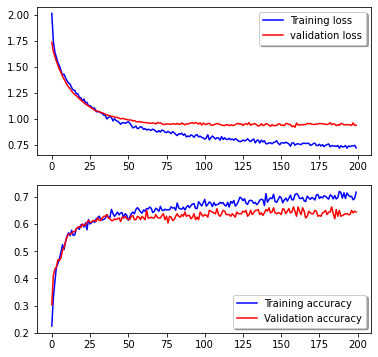

In [63]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#### Hyperparameter Tuning

In [64]:
# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=get_model, verbose=1)

# Using hyperparameters batch size and epochs
batches = [100, 50, 30]
epochs = [10, 15]
optimizer = ['SGD', 'Adam' ]


# grid search for batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, optimizer=optimizer)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, Y_train)

Epoch 1/10
852/852 [==============================] - 1s 685us/step - loss: 2.1697 - accuracy: 0.1796
Epoch 2/10
852/852 [==============================] - 0s 71us/step - loss: 2.1379 - accuracy: 0.1960
Epoch 3/10
852/852 [==============================] - 0s 70us/step - loss: 2.0781 - accuracy: 0.2160
Epoch 4/10
852/852 [==============================] - 0s 77us/step - loss: 2.0028 - accuracy: 0.2277
Epoch 5/10
852/852 [==============================] - 0s 71us/step - loss: 1.9797 - accuracy: 0.2559
Epoch 6/10
852/852 [==============================] - 0s 83us/step - loss: 1.9231 - accuracy: 0.2700
Epoch 7/10
852/852 [==============================] - 0s 85us/step - loss: 1.8757 - accuracy: 0.2735
Epoch 8/10
852/852 [==============================] - 0s 82us/step - loss: 1.8779 - accuracy: 0.2899
Epoch 9/10
852/852 [==============================] - 0s 78us/step - loss: 1.8386 - accuracy: 0.2958
Epoch 10/10
427/427 [==============================] - 0s 383us/step
Epoch 1/10
853/853 [=

Epoch 3/15
853/853 [==============================] - 0s 81us/step - loss: 1.9780 - accuracy: 0.2438
Epoch 4/15
853/853 [==============================] - 0s 82us/step - loss: 1.9126 - accuracy: 0.2767
Epoch 5/15
853/853 [==============================] - 0s 84us/step - loss: 1.8848 - accuracy: 0.2732
Epoch 6/15
853/853 [==============================] - 0s 81us/step - loss: 1.8287 - accuracy: 0.2755
Epoch 7/15
853/853 [==============================] - 0s 82us/step - loss: 1.7841 - accuracy: 0.3189
Epoch 8/15
853/853 [==============================] - 0s 83us/step - loss: 1.7510 - accuracy: 0.3283
Epoch 9/15
853/853 [==============================] - 0s 82us/step - loss: 1.7535 - accuracy: 0.3118
Epoch 10/15
853/853 [==============================] - 0s 82us/step - loss: 1.6916 - accuracy: 0.3318
Epoch 11/15
853/853 [==============================] - 0s 81us/step - loss: 1.6852 - accuracy: 0.3494
Epoch 12/15
853/853 [==============================] - 0s 74us/step - loss: 1.6433 - accu

853/853 [==============================] - 0s 95us/step - loss: 1.6884 - accuracy: 0.3271
Epoch 8/15
853/853 [==============================] - 0s 96us/step - loss: 1.6281 - accuracy: 0.4009
Epoch 9/15
853/853 [==============================] - 0s 93us/step - loss: 1.5837 - accuracy: 0.3904
Epoch 10/15
853/853 [==============================] - 0s 96us/step - loss: 1.5752 - accuracy: 0.4045
Epoch 11/15
853/853 [==============================] - ETA: 0s - loss: 1.5014 - accuracy: 0.42 - 0s 94us/step - loss: 1.5054 - accuracy: 0.4279
Epoch 12/15
853/853 [==============================] - 0s 95us/step - loss: 1.5022 - accuracy: 0.4220
Epoch 13/15
853/853 [==============================] - 0s 95us/step - loss: 1.4284 - accuracy: 0.4783
Epoch 14/15
853/853 [==============================] - 0s 236us/step - loss: 1.4434 - accuracy: 0.4748
Epoch 15/15
426/426 [==============================] - 1s 1ms/step
Epoch 1/15
853/853 [==============================] - 1s 1ms/step - loss: 2.0405 - accur

853/853 [==============================] - 0s 138us/step - loss: 1.4115 - accuracy: 0.4771
Epoch 10/15
853/853 [==============================] - 0s 188us/step - loss: 1.3630 - accuracy: 0.5041
Epoch 11/15
853/853 [==============================] - 0s 227us/step - loss: 1.3414 - accuracy: 0.5275
Epoch 12/15
853/853 [==============================] - 0s 184us/step - loss: 1.3128 - accuracy: 0.5487
Epoch 13/15
853/853 [==============================] - 0s 142us/step - loss: 1.2997 - accuracy: 0.5346
Epoch 14/15
853/853 [==============================] - 0s 188us/step - loss: 1.2708 - accuracy: 0.5475
Epoch 15/15
426/426 [==============================] - 1s 2ms/step
Epoch 1/15
853/853 [==============================] - 2s 2ms/step - loss: 2.0912 - accuracy: 0.2040
Epoch 2/15
853/853 [==============================] - 0s 152us/step - loss: 1.9692 - accuracy: 0.2532
Epoch 3/15
853/853 [==============================] - 0s 219us/step - loss: 1.7964 - accuracy: 0.3107
Epoch 4/15
853/853 [===

In [65]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.5981 using {'batch_size': 30, 'epochs': 15, 'optimizer': 'Adam'}
mean=0.48, std=0.02289 using {'batch_size': 100, 'epochs': 10, 'optimizer': 'SGD'}
mean=0.4879, std=0.02227 using {'batch_size': 100, 'epochs': 10, 'optimizer': 'Adam'}
mean=0.5254, std=0.0263 using {'batch_size': 100, 'epochs': 15, 'optimizer': 'SGD'}
mean=0.5355, std=0.04206 using {'batch_size': 100, 'epochs': 15, 'optimizer': 'Adam'}
mean=0.5356, std=0.01877 using {'batch_size': 50, 'epochs': 10, 'optimizer': 'SGD'}
mean=0.5536, std=0.009246 using {'batch_size': 50, 'epochs': 10, 'optimizer': 'Adam'}
mean=0.5708, std=0.01193 using {'batch_size': 50, 'epochs': 15, 'optimizer': 'SGD'}
mean=0.5692, std=0.0191 using {'batch_size': 50, 'epochs': 15, 'optimizer': 'Adam'}
mean=0.5622, std=0.01547 using {'batch_size': 30, 'epochs': 10, 'optimizer': 'SGD'}
mean=0.577, std=0.018 using {'batch_size': 30, 'epochs': 10, 'optimizer': 'Adam'}
mean=0.5629, std=0.01028 using {'batch_size': 30, 'epochs': 15, 'optimiz